Kaggle link : https://www.kaggle.com/datasets/vijayaadithyanvg/breast-cancer-prediction
This is binary class classification problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold

df = pd.read_csv("/users/amulya/Downloads/breastCancerPrediction.csv")
unwanted_columns = ['Unnamed: 32','id','compactness_mean','compactness_se','compactness_worst']
df = df.drop(unwanted_columns,axis = 1)
# print(df.isna().sum())
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
# print(df.describe().T)
count_malignant = np.count_nonzero(df['diagnosis'] == 1)
count_benign = np.count_nonzero(df['diagnosis'] == 0)
print(f'm:{count_malignant} b:{count_benign}')
print(df.describe().T)
df.info()

m:212 b:357
                         count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se 

/var/folders/2t/qm1yw0fs74gbtb4m6jqsrblc0000gp/T/ipykernel_50741/867295886.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})


here I have 2 tumours - M(malignant: likely to be cancerous), B(benign: not cancerous), 37% of people have cancer
There are no null values in the dataset.
here we can derive compactness_mean,compactness_se,compactness_worst (p**2/a-1) by using perimeter, area so i have removed those columns



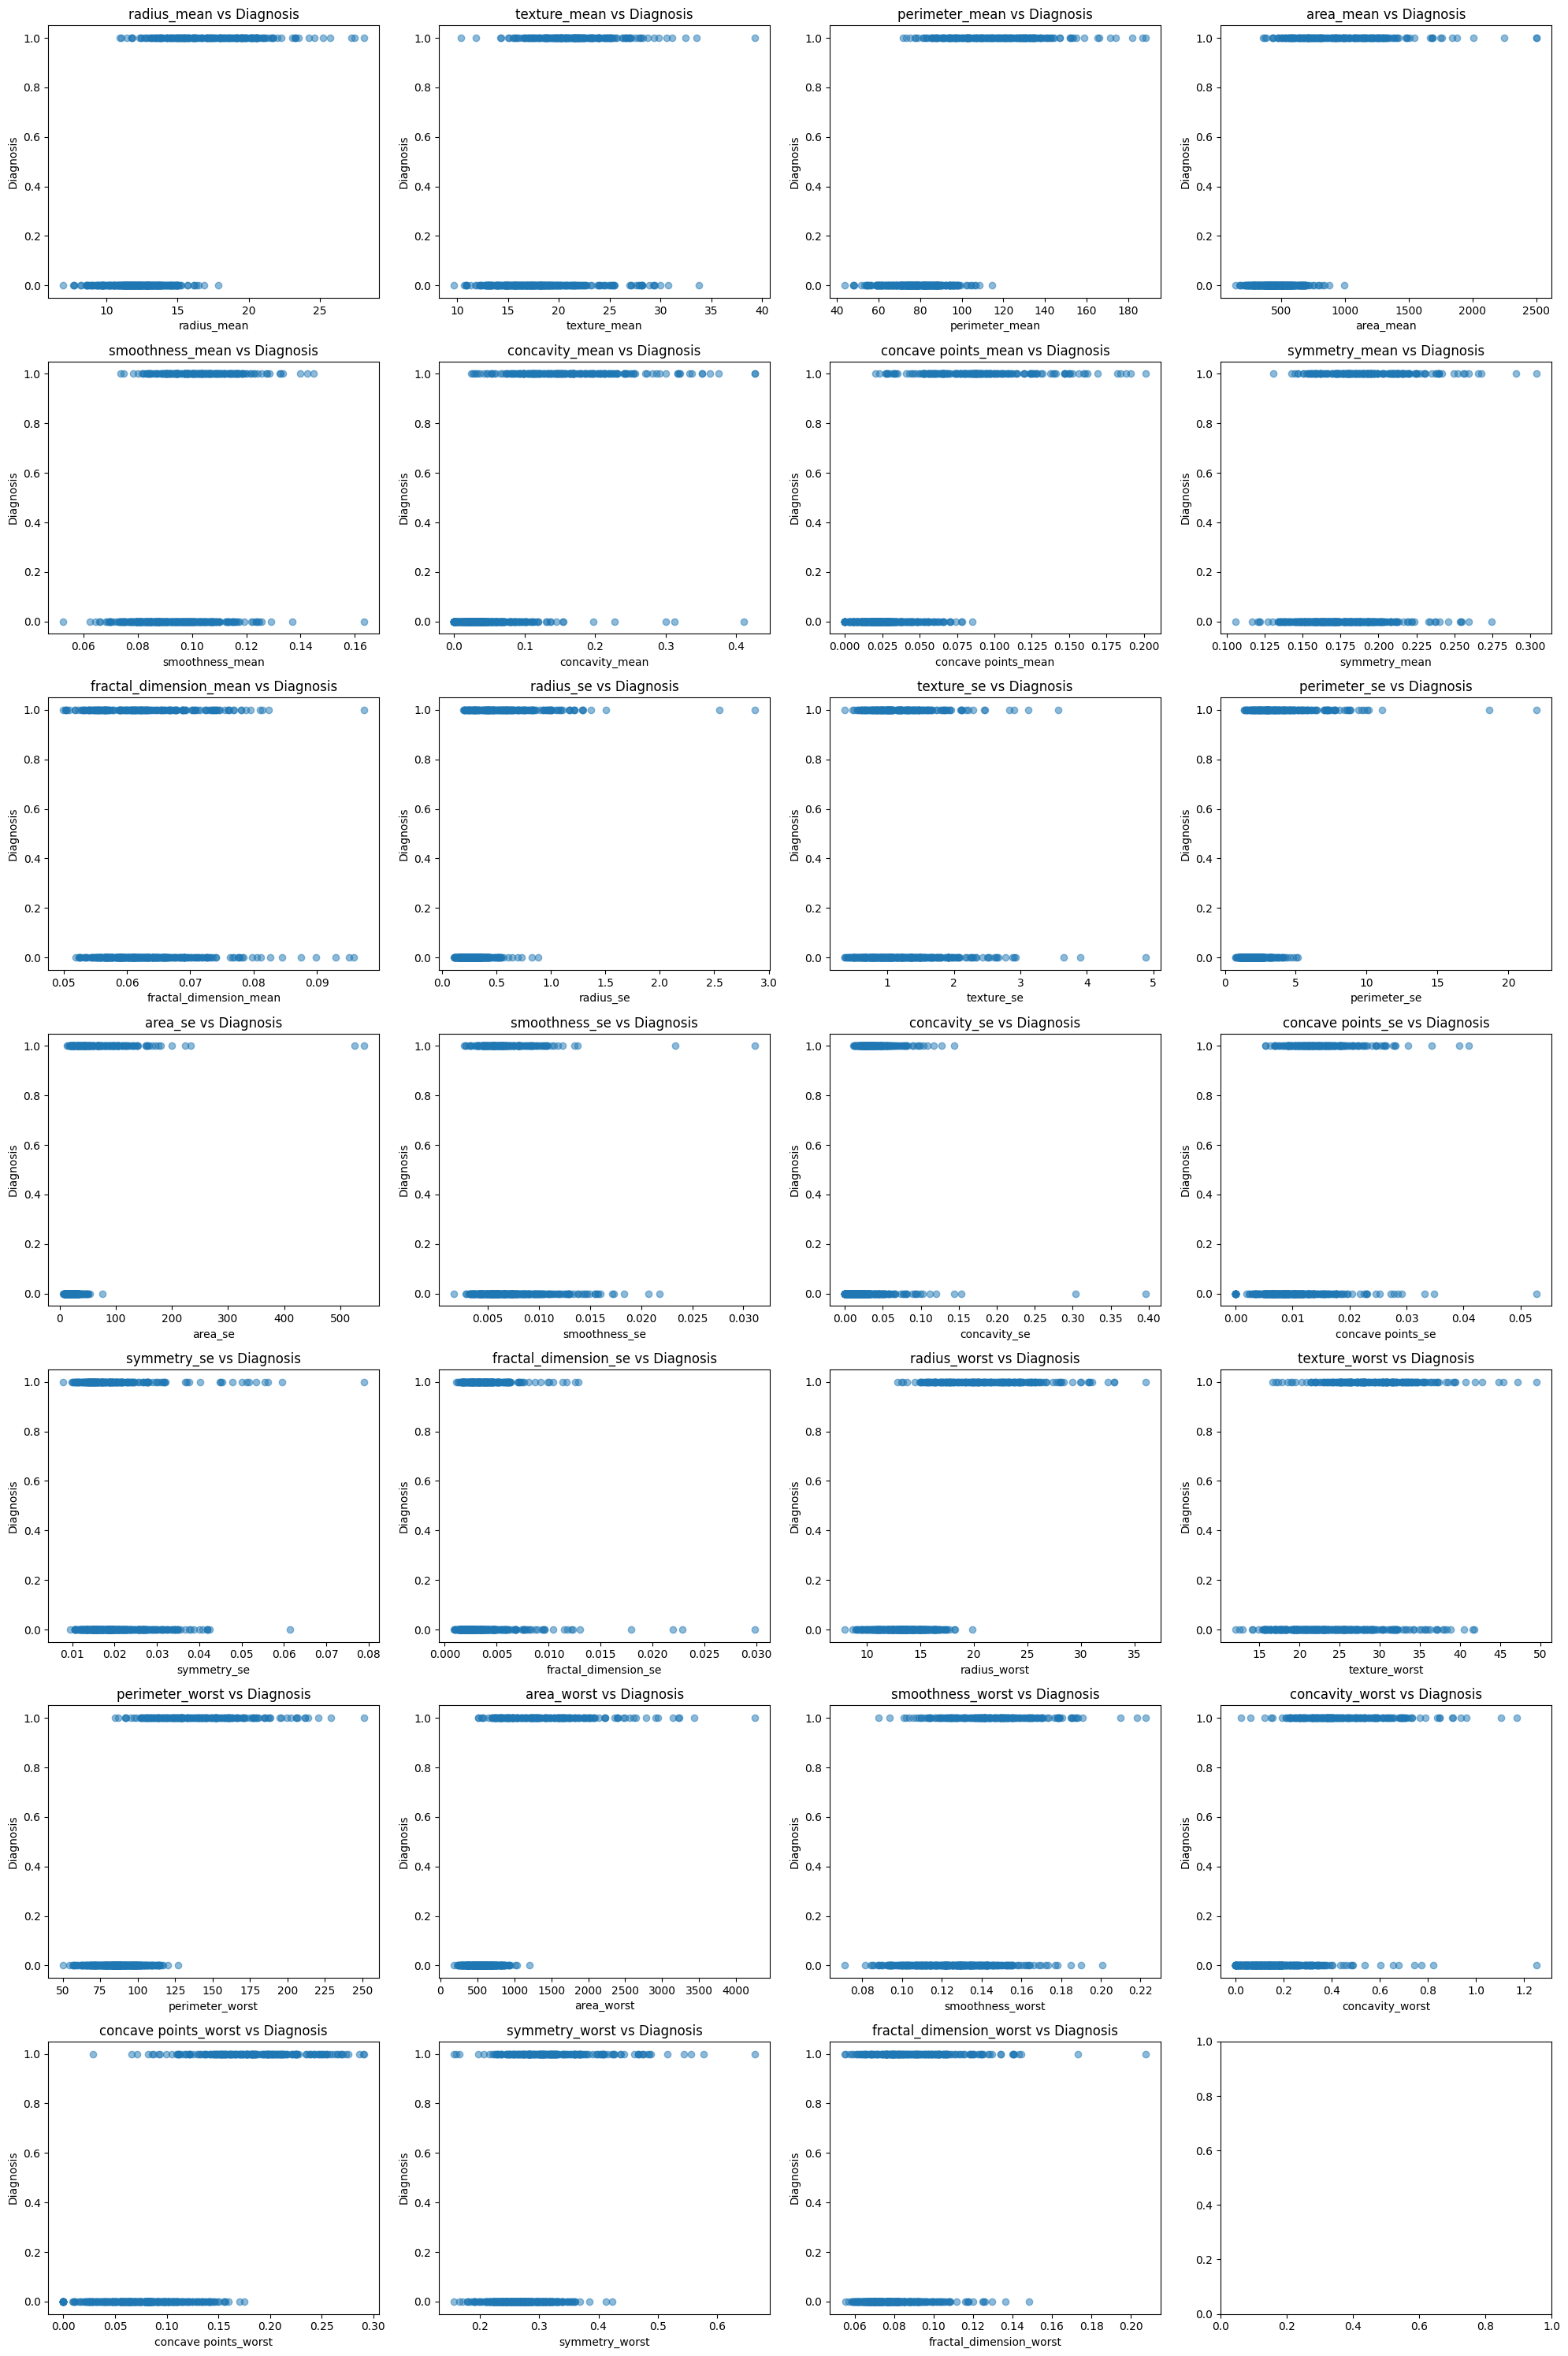

In [15]:
input_columns = df.drop('diagnosis', axis=1).columns
num_rows = 7
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
axes = axes.flatten()
for i, column in enumerate(input_columns):
    ax = axes[i]
    ax.scatter(df[column], df['diagnosis'], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('Diagnosis')
    ax.set_title(f'{column} vs Diagnosis')

plt.tight_layout()
plt.show()
    

here I can see some of the columns directly effecting ouput
if perimeter_mean is greater than 110 I can say person will get breast cancer similarly like below columns
area_mean cancavity mean, concave points mean 

accuracy : 0.9766081871345029
precision : 1.0
recall : 0.9365079365079365
f1 score :0.9672131147540983

0.9682539682539683
accuracy of trained data:  0.9673366834170855


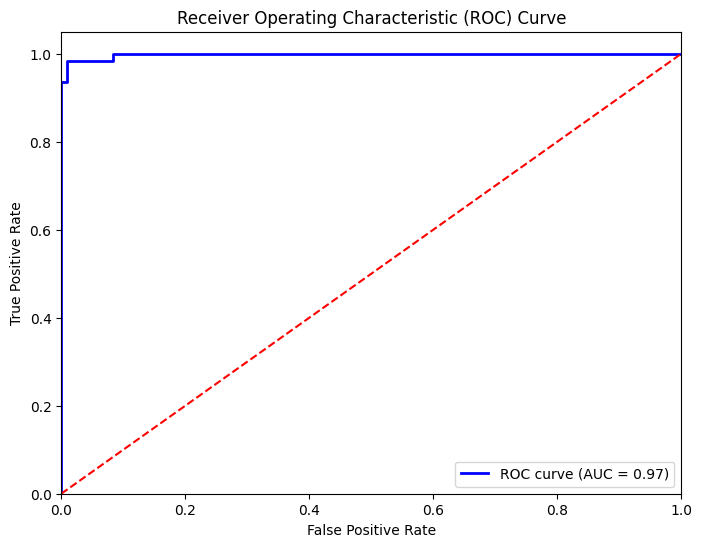

In [16]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# print(X_scaled)
# print(X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter = 500)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)
probability = model.predict_proba(x_test)
# print(probability)
accuracy = accuracy_score(y_test, y_pred)
acc = accuracy_score(y_train, y_pred1)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# confusion_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, probability[:, 1])
auc = roc_auc_score(y_test, y_pred)
print(f'accuracy : {accuracy}\nprecision : {precision}\nrecall : {recall}\nf1 score :{f1}\n')
print(auc)
fpr, tpr, thresholds = roc_curve(y_test, probability[:, 1])
print('accuracy of trained data: ',acc)
# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



accuracy : 0.9766081871345029
precision : 1.0
recall : 0.9365079365079365
f1 score :0.9672131147540983
confusion matrix : [[108   0]
 [  4  59]]
0.9682539682539683

after removing these columns 'texture_se','smoothness_se',
accuracy : 0.9766081871345029
precision : 1.0
recall : 0.9365079365079365
f1 score :0.9672131147540983
confusion matrix : [[108   0]
 [  4  59]]
0.9682539682539683

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train)
var_thres.get_support()
a = df.drop('diagnosis',axis =1)
x_train = pd.DataFrame(x_train, columns = a.columns)
x_test = pd.DataFrame(x_test, columns = a.columns)
print(len(x_train.columns[var_thres.get_support()]))
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[var_thres.get_support()]]

print(len(constant_columns))
for column in constant_columns:
    print(column)
x_train.drop(constant_columns,axis=1)
x_test.drop(constant_columns,axis =1)
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print("KNN Model Evaluation:")
print(f'Accuracy: {accuracy_knn}')
print(f'Precision: {precision_knn}')
print(f'Recall: {recall_knn}')
print(f'F1 Score: {f1_knn}')

27
0
KNN Model Evaluation:
Accuracy: 0.9532163742690059
Precision: 0.9661016949152542
Recall: 0.9047619047619048
F1 Score: 0.9344262295081968


[ 1.64062088  1.4648079   1.61461408  1.39986868  0.68024008  1.3693049
  2.07750008  0.44932743 -0.78064895  1.10593026  0.02121578  0.83995138
  0.73149867 -0.03959839 -0.21902778  0.25235348 -0.25791555 -0.6159507
  2.07661982  2.10866511  1.89342374  1.49287046  1.39121704  1.48876292
  2.55137744  1.36964722  0.3220231 ]


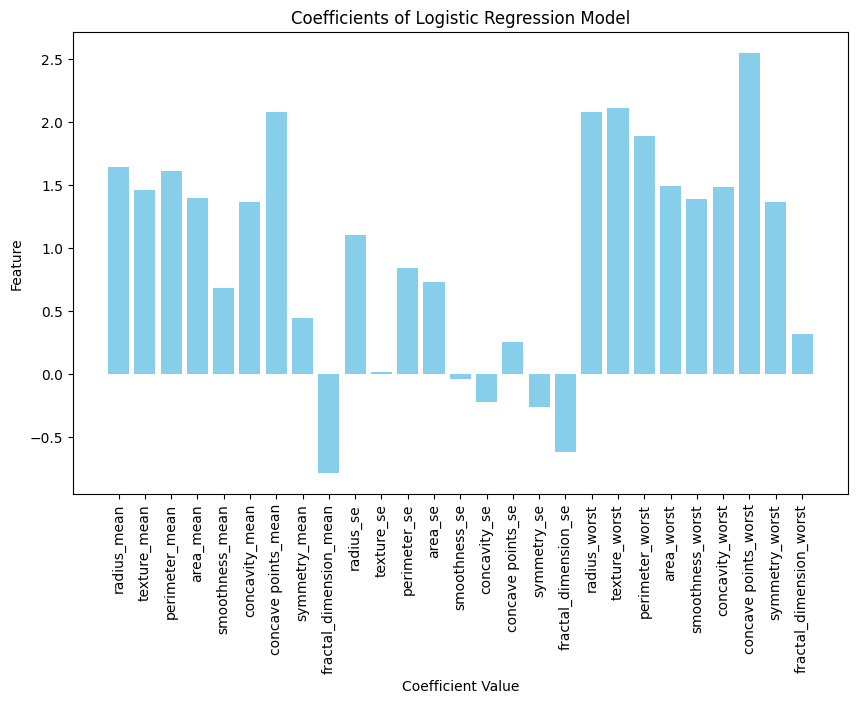

In [16]:
coefficients = model.coef_[0]
print(coefficients)
feature_names = X.columns
coefficients = coefficients.tolist()
feature_names = feature_names.tolist()
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.xticks(rotation=90)
plt.show()

based on the coefficient graph now I'm removing texture_se(0.05914658),smoothness_se(0.02363431) as these column coefficients close to zero

In [17]:
# filtered_df = df[df['radius_worst'] < 20]
# df = df[df['radius_worst'] < 20]
# a = df['diagnosis']
# print(df.info())
# print(a.value_counts())

now i have removed rows where perimeter_mean> 115 

In [18]:
filtered_df = df[df['perimeter_mean'] <= 115]
df = df[df['perimeter_mean'] <= 115]
a = df['diagnosis']
print('here',a)
print(df.info())
print(a.value_counts())


here 3      1
5      1
7      1
8      1
9      1
      ..
560    0
561    0
562    1
566    1
568    0
Name: diagnosis, Length: 467, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 3 to 568
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                467 non-null    int64  
 1   radius_mean              467 non-null    float64
 2   texture_mean             467 non-null    float64
 3   perimeter_mean           467 non-null    float64
 4   area_mean                467 non-null    float64
 5   smoothness_mean          467 non-null    float64
 6   concavity_mean           467 non-null    float64
 7   concave points_mean      467 non-null    float64
 8   symmetry_mean            467 non-null    float64
 9   fractal_dimension_mean   467 non-null    float64
 10  radius_se                467 non-null    float64
 11  texture_se               467 non-null    float

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
3          11.42         20.38           77.58      386.1          0.14250   
5          12.45         15.70           82.57      477.1          0.12780   
7          13.71         20.83           90.20      577.9          0.11890   
8          13.00         21.82           87.50      519.8          0.12730   
9          12.46         24.04           83.97      475.9          0.11860   
..           ...           ...             ...        ...              ...   
560        14.05         27.15           91.38      600.4          0.09929   
561        11.20         29.37           70.67      386.0          0.07449   
562        15.22         30.62          103.40      716.9          0.10480   
566        16.60         28.08          108.30      858.1          0.08455   
568         7.76         24.54           47.92      181.0          0.05263   

     concavity_mean  concave points_mean  symmetry_mean  \
3   

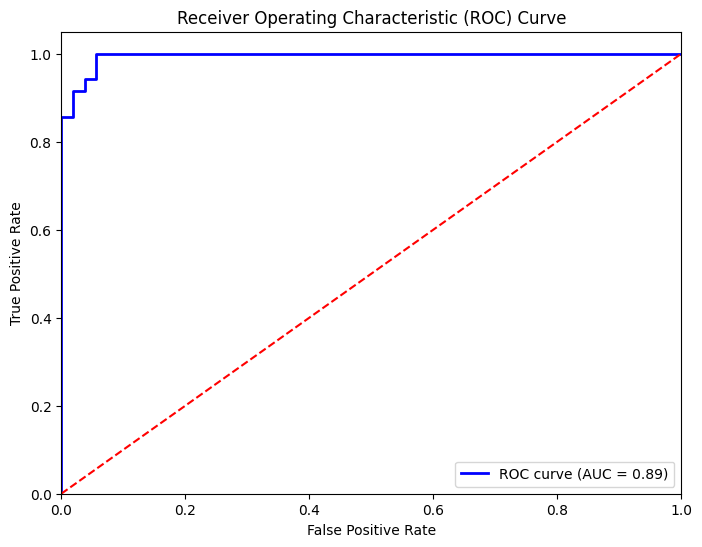

In [19]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
print(X)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# print(X_scaled)
# print(X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter = 500)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)
probability = model.predict_proba(x_test)
# print(probability)
accuracy = accuracy_score(y_test, y_pred)
acc = accuracy_score(y_train, y_pred1)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# confusion_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, probability[:, 1])
auc = roc_auc_score(y_test, y_pred)
print(f'accuracy : {accuracy}\nprecision : {precision}\nrecall : {recall}\nf1 score :{f1}\n')
print(auc)
fpr, tpr, thresholds = roc_curve(y_test, probability[:, 1])
print('accuracyof trained data: ',acc)
# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

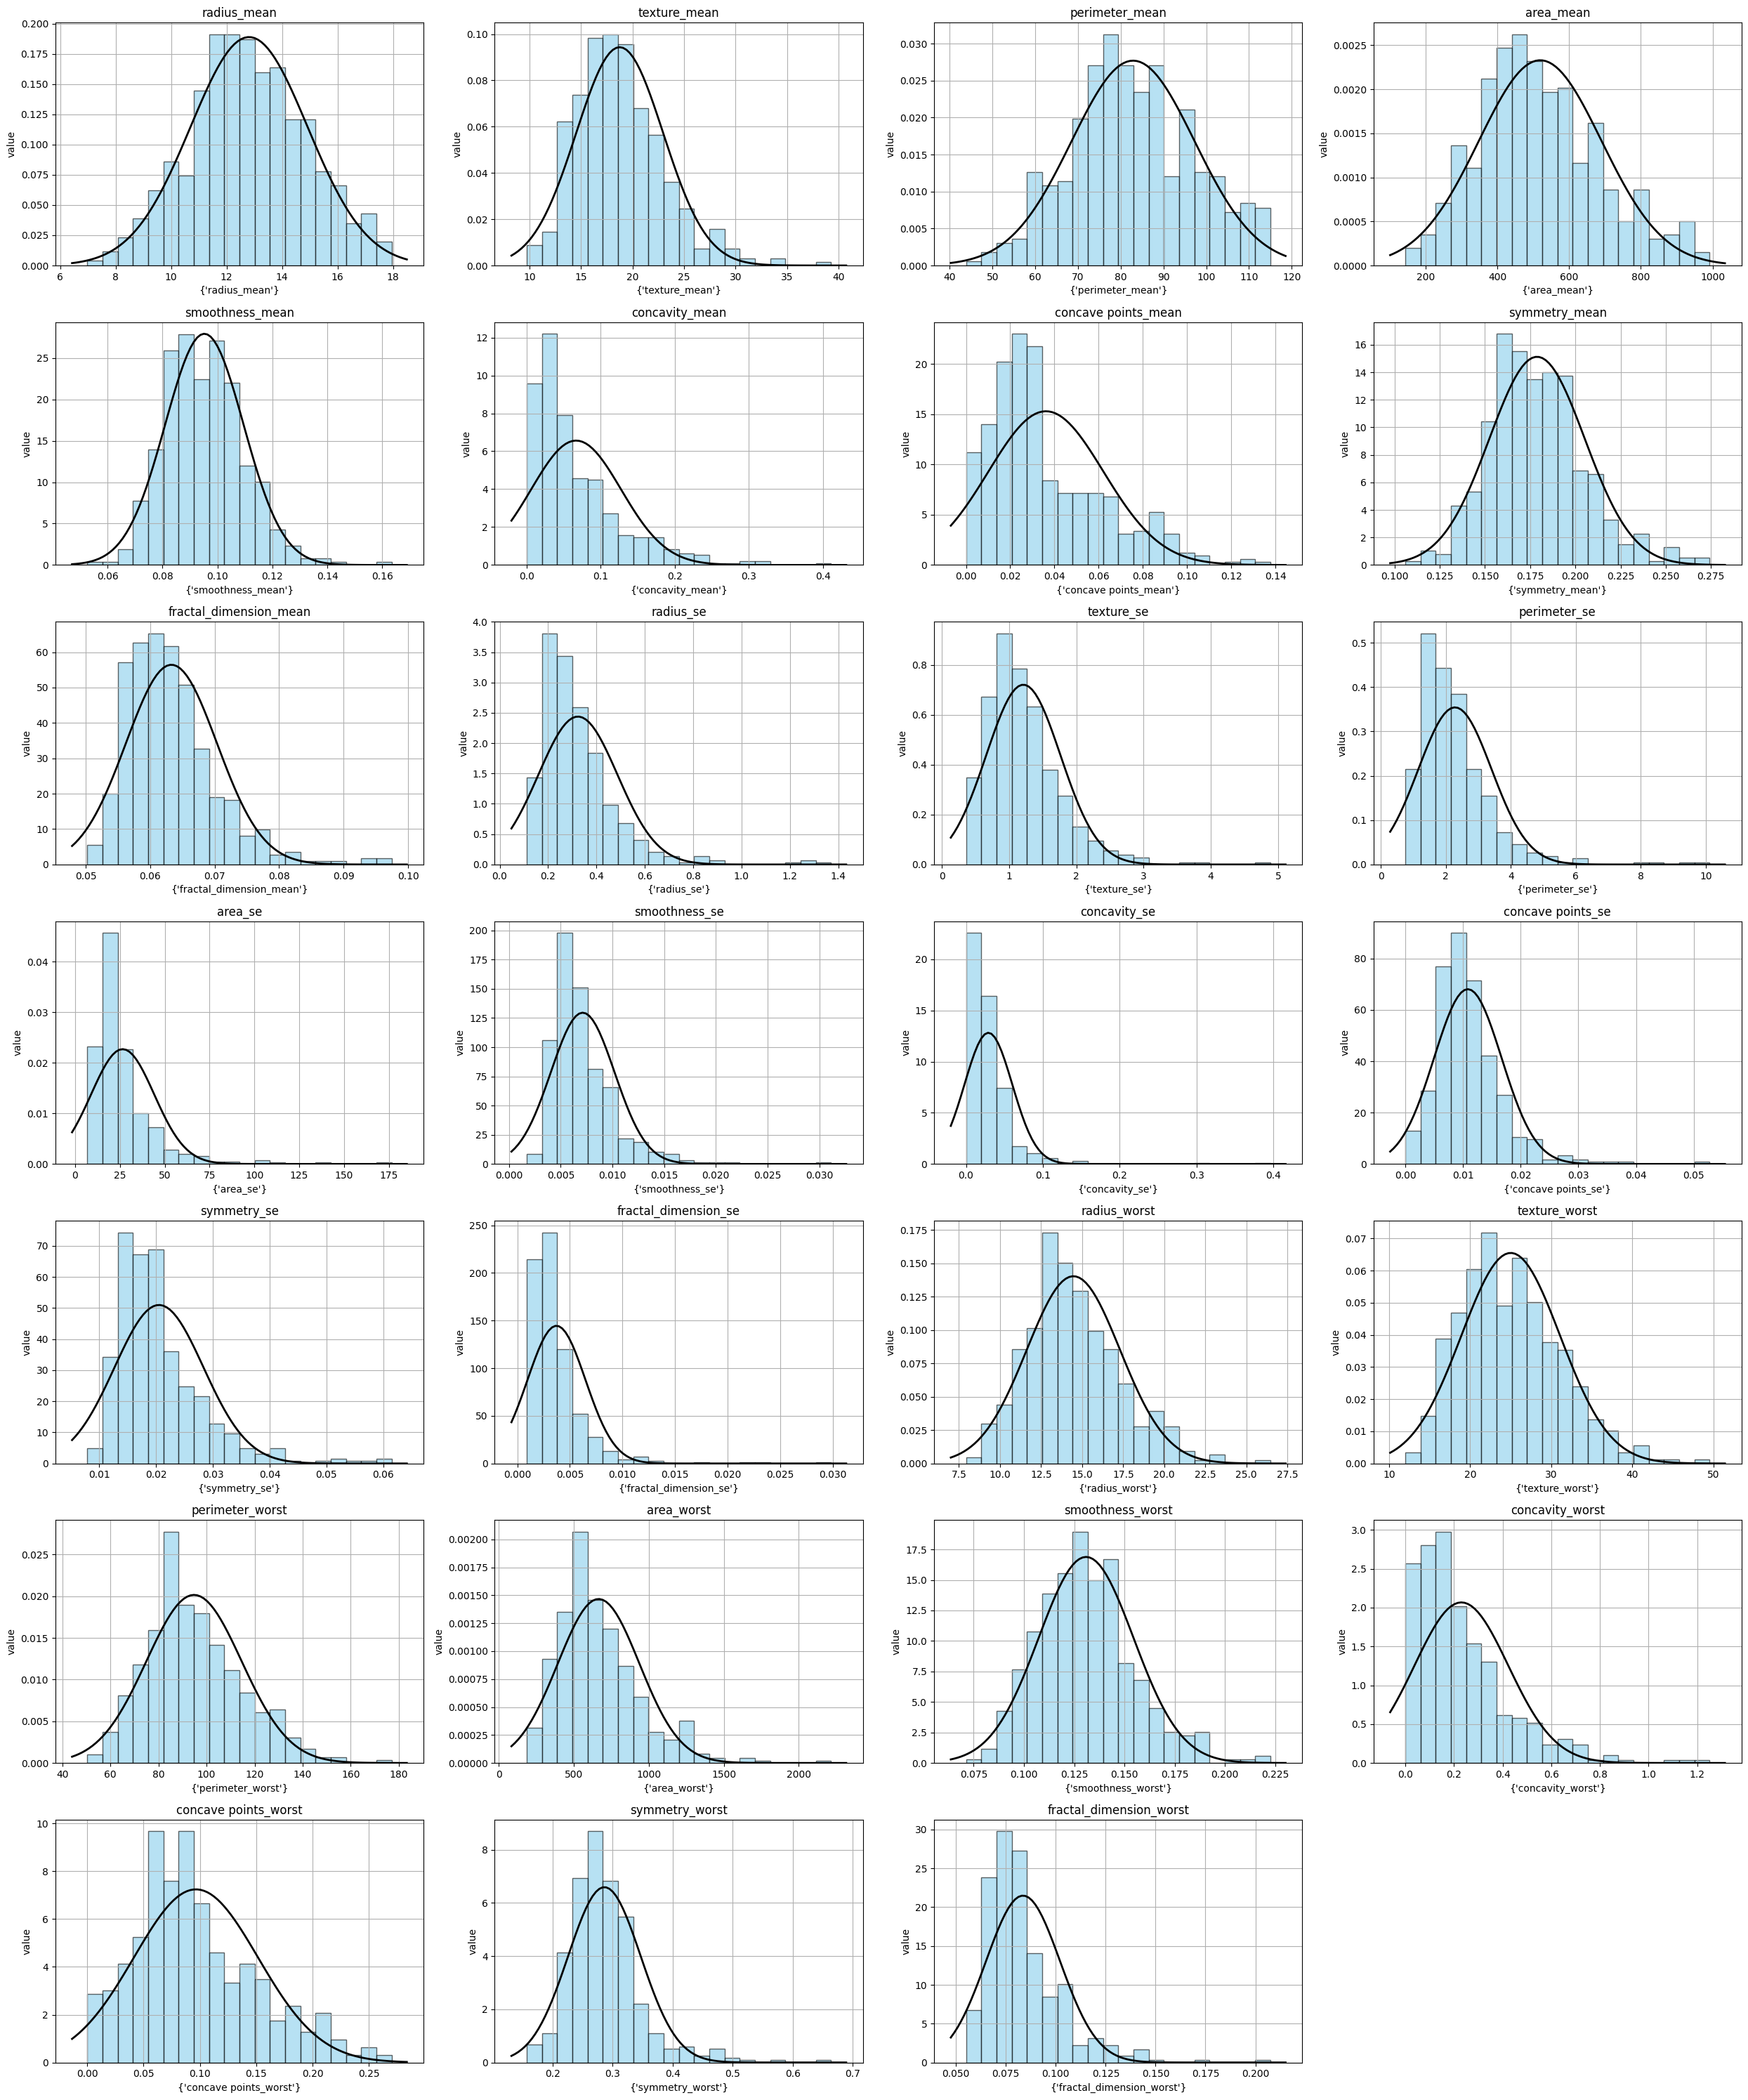

In [20]:
plt.figure(figsize=(25, 30))  # Adjust the figure size as needed
num_cols = len(X.columns)
num_rows = (num_cols + 3) // 4 
for i, col in enumerate(X):
    plt.subplot(num_rows, 4, i + 1)  # Adjust the subplot layout as needed
    mean = X[col].mean()
    std = X[col].std()
    
    # Plot the histogram of the data
    plt.hist(X[col], bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.title(col)
    plt.xlabel({col})
    plt.ylabel('value')
    plt.grid(True)

plt.tight_layout()
plt.show()